<h1 align=center><font size = 7>Logistic Regression</font></h1>

# Step0: Import Libraries

In [1]:
# pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix, classification_report#, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import math
from sklearn.pipeline import Pipeline

# Step1: Read Data

In [3]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Step2: Data Overview

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Step3: Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='O')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [8]:
df.shape

(10000, 12)

In [9]:
df.churn.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

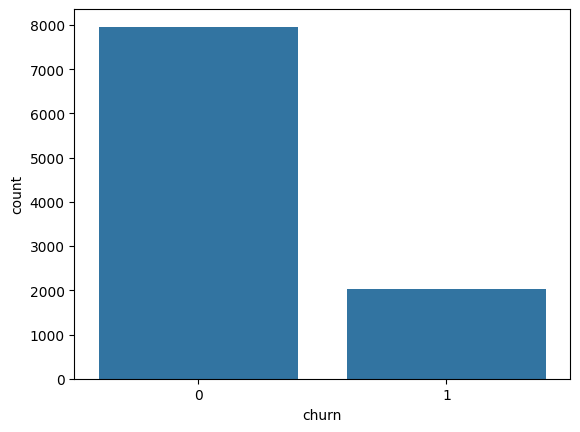

In [10]:
sns.countplot(data=df, x='churn')

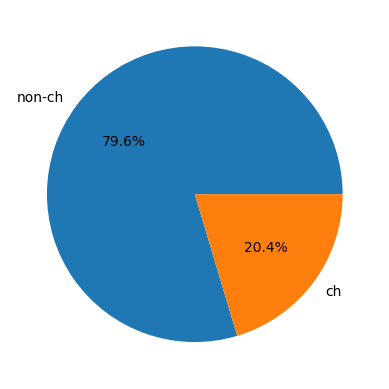

In [11]:
plt.pie(df['churn'].value_counts(), labels = ['non-ch', 'ch'], autopct='%1.1f%%')
plt.show()

In [12]:
df.groupby('country')['churn'].value_counts()

country  churn
France   0        4204
         1         810
Germany  0        1695
         1         814
Spain    0        2064
         1         413
Name: count, dtype: int64

In [13]:
corr = df.corr(numeric_only=True)

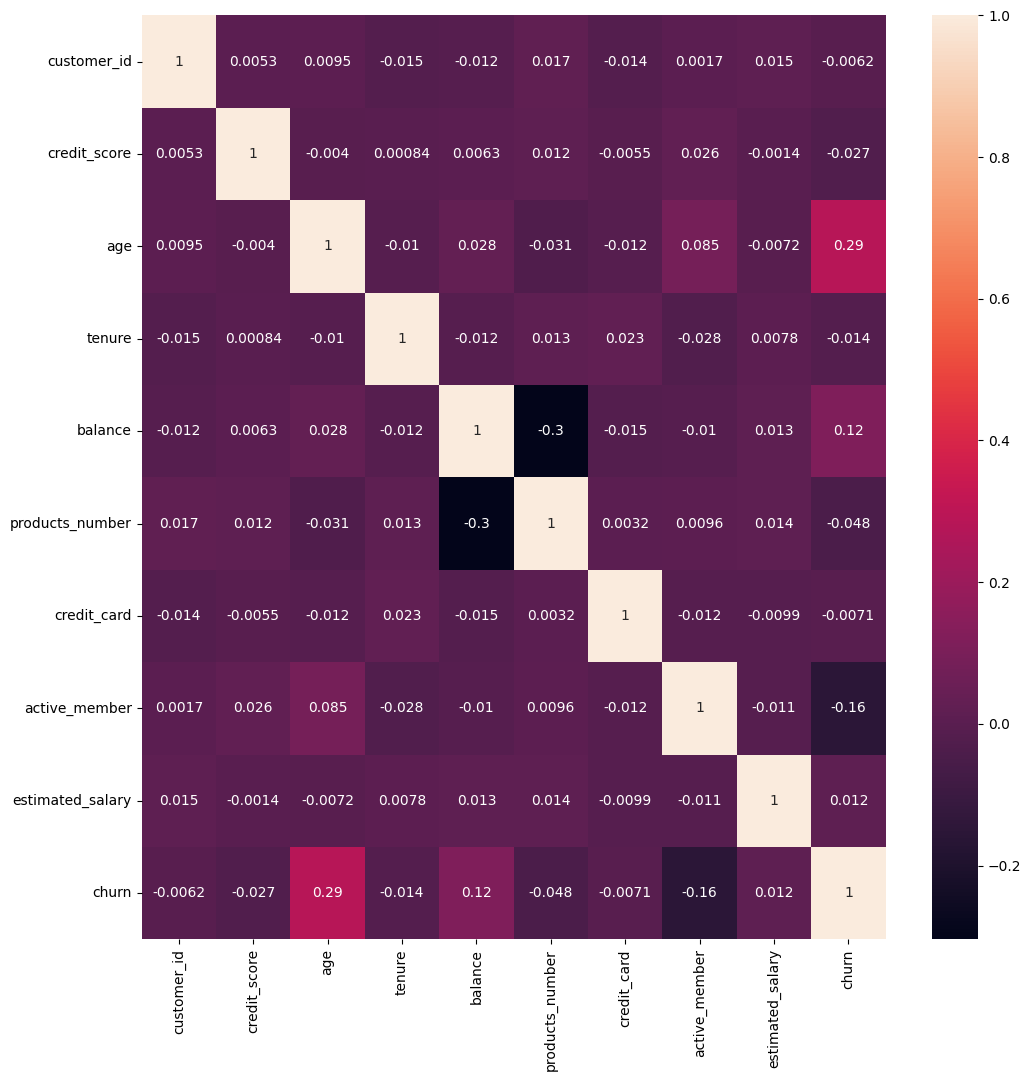

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)
plt.show()

In [15]:
def one_hot_encoding(df):
    df_num = df.select_dtypes(exclude='object')
    df_obj = df.select_dtypes(include='object')

    df_obj = pd.get_dummies(df_obj, drop_first=True)

    final_df = pd.concat([df_num, df_obj], axis=1)

    return final_df

In [16]:
df = one_hot_encoding(df)

In [17]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_Germany   10000 non-null  bool   
 11  country_Spain     10000 non-null  bool   
 12  gender_Male       10000 non-null  bool   
dtypes: bool(3), float64(2), int64(8)
memory usage: 810.7 KB


In [19]:
df.drop('customer_id', axis=1, inplace=True)

In [20]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


# Step4: X, y

In [21]:
X = df.drop(['churn'], axis=1)
y = df['churn']

In [22]:
X.shape, y.shape

((10000, 11), (10000,))

In [23]:
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

<Axes: xlabel='credit_score', ylabel='Density'>

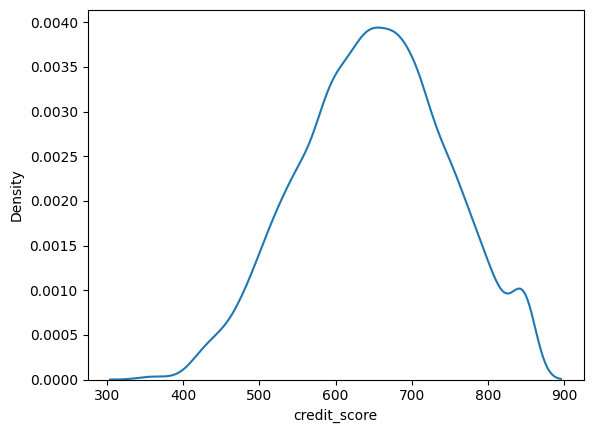

In [25]:
sns.kdeplot(X['credit_score'])

<Axes: xlabel='credit_score'>

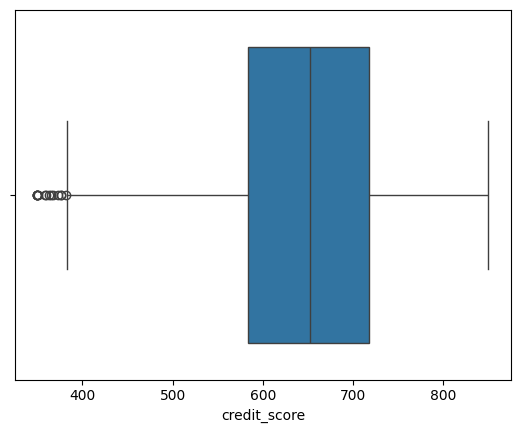

In [26]:
sns.boxplot(data=X, x='credit_score')

In [27]:
X['credit_score'] = X['credit_score'].apply(np.log)

<Axes: xlabel='credit_score'>

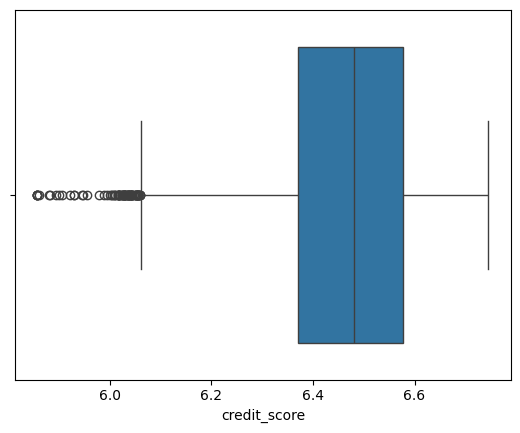

In [28]:
sns.boxplot(data=X, x='credit_score')

<Axes: xlabel='credit_score', ylabel='Density'>

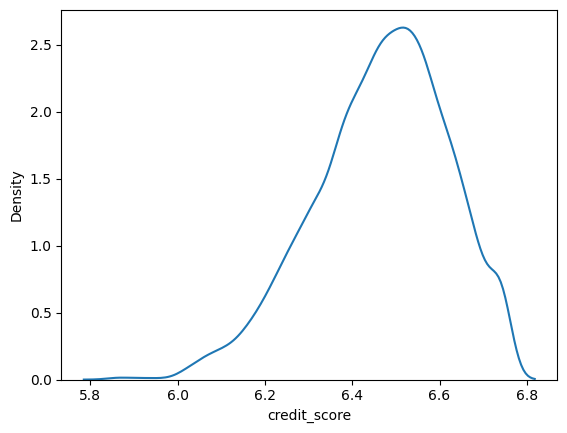

In [29]:
sns.kdeplot(X['credit_score'])

<Axes: xlabel='age'>

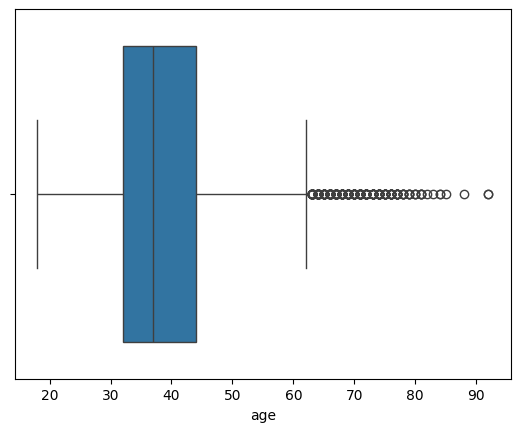

In [30]:
sns.boxplot(data=X, x='age')

<Axes: xlabel='age', ylabel='Density'>

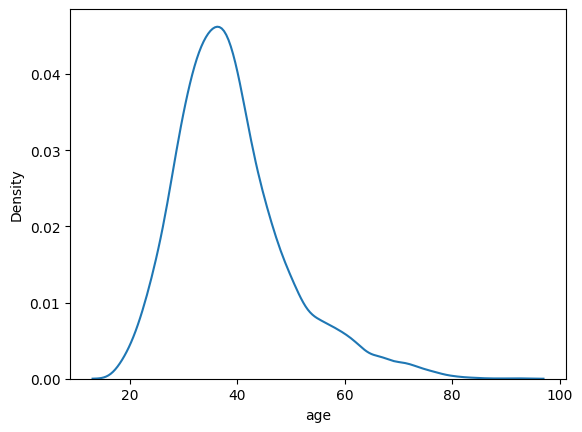

In [31]:
sns.kdeplot(X['age'])

<Axes: xlabel='age', ylabel='Density'>

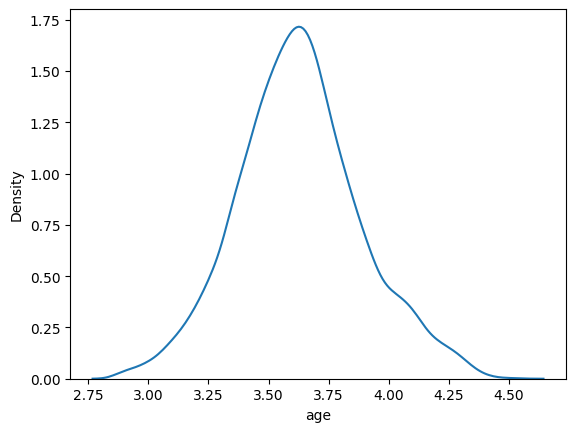

In [32]:
X['age'] = X['age'].apply(np.log)
sns.kdeplot(X['age'])

<Axes: xlabel='balance', ylabel='Density'>

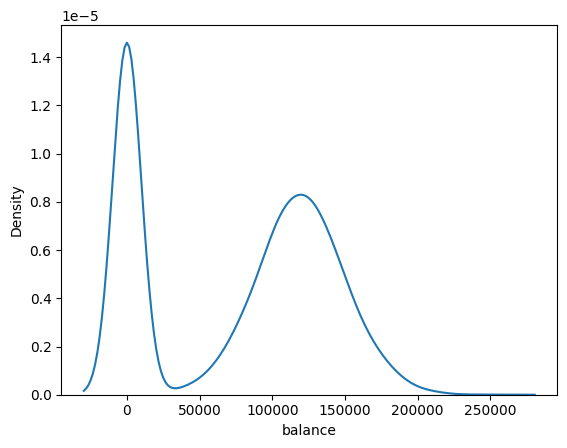

In [33]:
sns.kdeplot(X['balance'])

In [34]:
# X['balance'] = X['balance'].apply(np.log)
# sns.kdeplot(X['balance'])

In [35]:
def over_sampling(X, y):
    
    resampler = SMOTE(random_state=101)

    # Resampling the data
    X_resampled, y_resampled = resampler.fit_resample(X, y)

    # Resampled data
    
    return X_resampled, y_resampled

In [43]:
X_resampling, y_resampling = over_sampling(X, y)

In [44]:
X_resampling.shape

(15926, 11)

In [45]:
y_resampling.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

In [ ]:
# inf
# X.replace([np.inf, -np.inf], 0, inplace=True)

In [47]:
X, y = over_sampling(X, y)

# Step5: Logistic Regression

## train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train

array([[ 1.7176911 , -2.32523933,  0.80761119, ...,  1.32259015,
        -0.63123944, -1.22354402],
       [ 1.06970093,  0.22003258, -1.39992678, ..., -0.75609213,
        -0.63123944,  0.81729793],
       [ 0.92239425,  1.53651338, -1.39992678, ...,  1.32259015,
        -0.63123944,  0.81729793],
       ...,
       [ 0.27302664,  0.31577813,  1.17553419, ..., -0.75609213,
        -0.63123944,  0.81729793],
       [-0.06715269,  0.55721699,  0.0717652 , ..., -0.75609213,
        -0.63123944,  0.81729793],
       [ 0.57531467,  1.01005308, -1.39992678, ...,  1.32259015,
        -0.63123944,  0.81729793]], shape=(12740, 11))

## Creat the Model

In [52]:
lg_model = LogisticRegression()

In [53]:
lg_model

LogisticRegression()

## Train the Model

In [54]:
lg_model.fit(X_train, y_train)

LogisticRegression()

## Print Coefficient

In [55]:
lg_model.coef_

array([[-0.09098094,  0.95054734, -0.14422931, -0.0679716 , -0.37705471,
        -0.29214295, -0.87224342,  0.03262728,  0.79806961,  0.32371696,
         0.02233854]])

##  Prediction & Evaluation
<hr>
print classification report

In [56]:
y_pred = lg_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1], shape=(3186,))

In [57]:
accuracy_score(y_test, y_pred)

0.7724419334588826

In [58]:
f1_score(y_test, y_pred)

0.7678514249119437

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1633
           1       0.76      0.77      0.77      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Hobot</p>
</div>